Import some libraries:

In [78]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import the dataset

In [63]:
dataset = pd.read_csv('data.csv') #You need to change #directory accordingly
dataset.head(10) #Return 10 rows of data
dataset.describe()

,PD1,PD2,PD3,PG1,PG2,PG3
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,89.987235,100.045967,124.987823,103.417698,100.230874,111.304958
std,5.204614,5.764990,7.197283,6.681616,0.530948,5.285473
min,81.000112,90.000189,112.500157,9.975613,10.950153,95.671251
25%,85.469573,95.082228,118.808820,99.999989,100.000000,107.302500
50%,89.989000,100.058494,124.961037,100.000000,100.000000,111.978383
75%,94.503407,104.998130,131.201805,106.707992,100.386401,115.469712
max,98.999904,109.999967,137.499294,130.554174,101.759920,156.977023


Changing pandas dataframe to numpy array:

In [64]:
X = dataset.iloc[:,:3].values
y = dataset.iloc[:,3:6].values

Normalize the data:

In [65]:
PG_min = 10
PG_max1 = 250 
PG_max2 = 300
PG_max3 = 270
print(type(PG_min))
y[:,0] = (y[:,0] - PG_min) / (PG_max1 - PG_min)
y[:,1] = (y[:,1] - PG_min) / (PG_max2 - PG_min)
y[:,2] = (y[:,2] - PG_min) / (PG_max3 - PG_min)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
mean = np.mean(X)
std = np.std(X)
X = (X - mean) / std
#X = sc.fit_transform(X)

<class 'int'>


Split the data to training and testing

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

Build the neural network

In [67]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense

Neural Network:

In [68]:
model = Sequential()

initializer = keras.initializers.HeUniform(seed=None)
# initilizer  = keras.initializers.Constant(value=0.1)
# initialier = keras.initializers.VarianceScaling(    scale=1.0, mode="fan_in", distribution="truncated_normal", seed=None)
#initializer = keras.initializers.Ones()
layer1 = Dense(32, input_dim=3, activation='relu', kernel_initializer = initializer)
layer2 = Dense(16, activation='relu',kernel_initializer = initializer)
layer3 = Dense(8, activation='relu',kernel_initializer = initializer)
layer4 = Dense(3, activation='linear',kernel_initializer = initializer)
model.add(layer1)
model.add(layer2)
model.add(layer3)
model.add(layer4)

plot the model

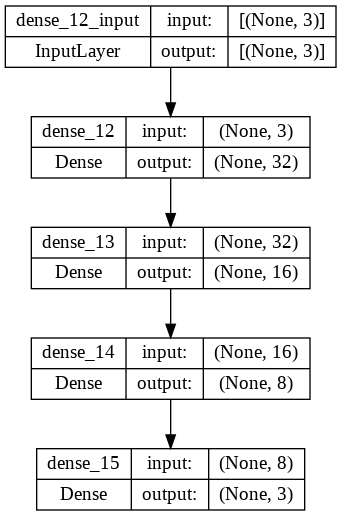

In [69]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Specify loss function and optimizer

In [70]:
sgd = keras.optimizers.SGD(learning_rate=1e-3, momentum = 0.5)
adam = keras.optimizers.Adam(learning_rate = 1e-3)
model.compile(loss='mse', optimizer= adam, metrics=['mse'])
#model.compile(loss='mse', optimizer=adam, metrics=['mse'])

Train the model:

In [71]:
history=model.fit(X_train, y_train, epochs=300, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/300
438/438 [==============================] - 2s 3ms/step - loss: 0.3659 - mse: 0.3659 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 2/300
438/438 [==============================] - 1s 2ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 4.6942e-04 - val_mse: 4.6942e-04
Epoch 3/300
438/438 [==============================] - 1s 2ms/step - loss: 2.7083e-04 - mse: 2.7083e-04 - val_loss: 1.8102e-04 - val_mse: 1.8102e-04
Epoch 4/300
438/438 [==============================] - 1s 3ms/step - loss: 1.6042e-04 - mse: 1.6042e-04 - val_loss: 1.4226e-04 - val_mse: 1.4226e-04
Epoch 5/300
438/438 [==============================] - 2s 4ms/step - loss: 1.3150e-04 - mse: 1.3150e-04 - val_loss: 1.2306e-04 - val_mse: 1.2306e-04
Epoch 6/300
438/438 [==============================] - 1s 3ms/step - loss: 1.1532e-04 - mse: 1.1532e-04 - val_loss: 1.1055e-04 - val_mse: 1.1055e-04
Epoch 7/300
438/438 [==============================] - 1s 2ms/step - loss: 1.0218e-04 - mse: 1.0218e-04 - val_loss: 9.6849e-05 - v

plot the outcomes

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


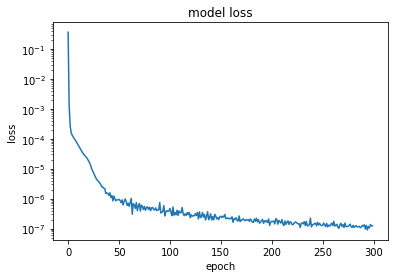

In [72]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'validation'], loc='upper left')
plt.yscale('log')
plt.show()

Check the model's performance on the test data:

In [73]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
percentage_error = mape(y_pred,y_test)
mean_squared_error = mse(y_pred,y_test)
print("the percentage error is: ", round(percentage_error*100,2),"%")
print("the mean squared error is: ", mean_squared_error, )
print("the mean squared error of a dummy model is: ", 2*(0.5)**2)

469/469 [==============================] - 1s 1ms/step
the percentage error is:  0.06 %
the mean squared error is:  5.975077155240307e-06
the mean squared error of a dummy model is:  0.5


Inverse Transform the predicted and test data

In [74]:
PG_max = np.array([PG_max1, PG_max2, PG_max3])
PG_min = 10
PG_min = np.array([PG_min, PG_min, PG_min])
#predicted1 = (y_pred[:,1] * (PG_max[:,1] - PG_min[:,1])) + PG_min[:,1]
#predicted2 = (y_pred[:,2] * (PG_max[:,2] - PG_min[:,2])) + PG_min[:,2]
#predicted3 = (y_pred[:,3] * (PG_max[:,3] - PG_min[:,3])) + PG_min[:,3]


In [75]:
PG_min.shape

(3,)

Test on a new instance of the demand 

In [76]:
predicted = np.multiply(y_pred , (PG_max - PG_min) ) + PG_min
test = y_test * (PG_max - PG_min)  + PG_min
sheet = pd.DataFrame(X_test*std + mean, columns=['PD1','PD2','PD3'])
sheet["PG1_test"] = test[:,0]
sheet["PG1_pred"] = predicted[:,0]
sheet["PG2_test"] = test[:,1]
sheet["PG2_pred"] = predicted[:,1]
sheet["PG3_test"] = test[:,2]
sheet["PG3_pred"] = predicted[:,2]
sheet.head()

,PD1,PD2,PD3,PG1_test,PG1_pred,PG2_test,PG2_pred,PG3_test,PG3_pred
0,92.149486,90.064642,116.777115,96.242698,96.130338,100.000000,100.016711,102.748545,102.630467
1,90.015236,109.620189,113.779659,101.559338,101.523416,100.089865,100.072595,111.753826,111.707980
2,85.022491,94.998539,136.122685,100.000000,99.931622,100.000000,99.992546,116.143715,116.057558
3,95.574729,109.710571,120.897114,111.967790,111.906641,100.689851,100.640920,113.344153,113.307439
4,96.281650,103.664106,125.062159,106.159042,106.093085,100.354761,100.330492,118.405394,118.314943


In [77]:
PD = [[85, 95, 120]] 
x = ( PD - mean ) / std
from timeit import default_timer as timer
start = timer()
y_new = model.predict(x)
end = timer()
print(end-start)
y_new = y_new * (PG_max - PG_min) + PG_min
y_new

1/1 [==============================] - 0s 20ms/step
0.06915228199977719


array([[ 96.65982008,  99.97078419, 103.12187612]])

Visualize the architecture

In [79]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model, title="NN for DC OPF")


ModuleNotFoundError: ignored

plot a relu function 